# sdsc [Part 1]

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import sys
from ipywidgets import interact

In [247]:
sys.path.append('src')
from motorControl import *
from trajectoryPlanning import *
from util import *

## Load Absolute Home, Upper right corner, out of the way, aligned with sharpie marks
f = open('savedPositions/absolute/home.p', 'r')
home = pickle.load(f)
f.close()

In [217]:
rc = connect(portName = "/dev/tty.usbserial-A9ETDN3N", baudRate=38400)
rc.Open()

1

### Initialized Motor Classes

- Really important to initialze these first to restore positions from last session!

In [248]:
#Initialize motor objects for each motor:
vL = Motor(address = 0x81, motorNumber = 2, rc = rc, signFlipped = True, \
           motorCounter = 0, kPID = [1e-2, 1.0])
vR = Motor(address = 0x81, motorNumber = 1, rc = rc, signFlipped = True, \
           motorCounter = 1, kPID = [1e-2, 1.0])
LR = Motor(address = 0x80, motorNumber = 1, rc = rc, signFlipped = True, 
           motorCounter = 2, kPID = [1e-2, 1.0])
FB = Motor(address = 0x80, motorNumber = 2, rc = rc, signFlipped = False, \
           motorCounter = 3, kPID = [1e-2, 1.0])
yaw = Motor(address = 0x82, motorNumber = 2, rc = rc, signFlipped = True, \
            motorCounter = 4, kPID = [1e-3, 1.0])
pitch = Motor(address = 0x82, motorNumber = 1, rc = rc, signFlipped = True, \
              motorCounter = 5, kPID = [1e-3, 1.0])

#Keep in a nice motor list:
motors = [vL, vR, LR, FB, yaw, pitch]

In [249]:
getPositions(motors)

[0, -4, -64665, -90043, 6987, 0]

In [250]:
home

[0, -4, -64665, -90043, 6987, 0]

In [227]:
oldPosition = getPositions(motors)

In [13]:
# #Are we intermittently not getting data from our controlers?

for i in range(5):
    start_time = time.time()
    p = getPositions(motors)
    print(norm(np.array(p) - np.array(oldPosition)), p, (time.time()-start_time))
    time.sleep(0.1)

(0.0, [0, 0, -59479, -101257, -25171, 0], 6.087636947631836)
(0.0, [0, 0, -59479, -101257, -25171, 0], 6.070563077926636)
(0.0, [0, 0, -59479, -101257, -25171, 0], 6.086863040924072)
(0.0, [0, 0, -59479, -101257, -25171, 0], 6.085521936416626)
(0.0, [0, 0, -59479, -101257, -25171, 0], 6.088749885559082)


In [108]:
times = []
for i in range(3):
    start_time = time.time()
    vL.getPosition()
    times.append(time.time()-start_time)

In [109]:
times

[3.0056989192962646, 3.0086259841918945, 3.013491153717041]

In [114]:
times = []
for i in range(1000):
    start_time = time.time()
    FB.getPosition()
    times.append(time.time()-start_time)

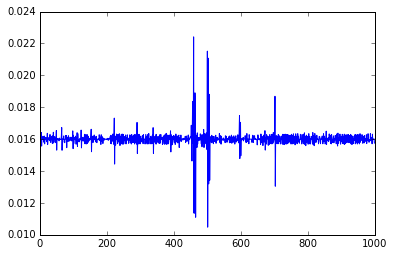

In [115]:
plot(times)

In [116]:
times = []
for i in range(1000):
    start_time = time.time()
    pitch.getPosition()
    times.append(time.time()-start_time)

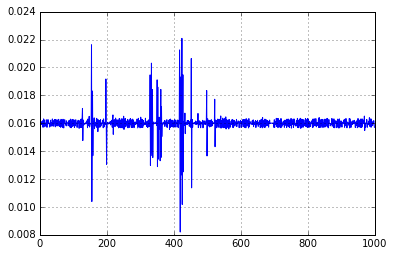

In [117]:
plot(times)
grid(1)

In [146]:
vL.getPosition()

0

In [147]:
vR.getPosition()

-5

In [148]:
FB.getPosition()

-101257

In [149]:
LR.getPosition()

-59479

In [150]:
pitch.getPosition()

0

In [151]:
yaw.getPosition()

-25171

In [152]:
yaw.getPosition()

-25171

In [153]:
home

[0, 1, -59516, -101328, -25211, 0]

In [213]:
getPositions(motors)

[0, -13, -47616, -101332, -25267, 0]

In [254]:
MC = ManualControl(rc)
interact(MC.manualControl, leftUD = (-50, 50), rightUD = (-50, 50), leftRight = (-127, 127), \
         fB = (-127, 127), tilt = (-50, 50), pan = (-50, 50))

<function ipywidgets.widgets.interaction.<lambda>>

In [253]:
stopAll(rc)
savePositions(motors)
getPositions(motors)

[0, -5, -7585, 17335, 24775, 0]

In [157]:
stopAll(rc)
savePositions(motors)
getPositions(motors)

[0, -5, -59479, -101257, -25171, 0]

In [10]:
# levelRig(motors, home, rc, moveTime = 5.0)

## Save absolute home

- Only needed for hard resets

In [246]:
# # Center facing me shot
# f = open('savedPositions/absolute/home.p', 'wb')
# pickle.dump(getPositions(motors), f, protocol=pickle.HIGHEST_PROTOCOL)
# f.close()

## Save Relative Position

In [256]:
# delta = np.array(getPositions(motors))-np.array(home)
# f = open('savedPositions/relative/sdcs/A.p', 'wb')
# pickle.dump(delta, f, protocol=pickle.HIGHEST_PROTOCOL)
# f.close()

## Load Relative Positions

In [257]:
#Position A
f = open('savedPositions/relative/sdcs/A.p', 'r')
A = pickle.load(f)+np.array(home) #Return to absolute coords
f.close()

In [229]:
A

array([    0,   -11, -6021,  1451, -2979,     1])

In [230]:
getPositions(motors)

[0, -8, -59479, -101332, -25267, 0]

In [161]:
home

[0, 1, -59516, -101328, -25211, 0]

In [16]:
# #Position B
# f = open('savedPositions/relative/CSM/B.p', 'r')
# B = pickle.load(f)+np.array(home) #Return to absolute coords
# f.close()

In [17]:
# #Position C
# f = open('savedPositions/relative/CSM/C.p', 'r')
# C = pickle.load(f)+np.array(home) #Return to absolute coords
# f.close()

## Move the rig

In [270]:
targetPositions = home
totalTime = 60.0
rampTime = 10.0


startingPositions = getPositions(motors)
lookAheadTime = 1.0
tolerance = 100.0 #Anything less than this many ticks we're calling "Not a move"

motorsToMove = []
targetPositionsToMove = []
for i, motor in enumerate(motors):
    if abs(motor.getPosition()-targetPositions[i]) > tolerance:
        motorsToMove.append(motor)
        targetPositionsToMove.append(targetPositions[i])
        
trajectories = []
for i, motor in enumerate(motorsToMove):
    trajectories.append(SimpleQuadraticTrajectory(tu = rampTime, tt = totalTime, \
                                            p1 = motor.getPosition(), p2 = targetPositionsToMove[i]))
    

    
print np.array(targetPositions) - startingPositions
print 'Planning to move ' +  str(len(motorsToMove)) + ' motors.'

[      0       3  -57040 -107283  -17765       0]
Planning to move 3 motors.


In [271]:
for motor in motorsToMove:
    motor.initialize(targetVelocityMin = -25000.0, targetVelocityMax = 25000.0)
    motor.clearTracking()
    
startTime = time.time()
timeElapsed = 0.0
cycle_times = [] 
previous_time = startTime
    
while timeElapsed < totalTime:
    #I think this time variable my be causing problem, write a checker:
    current_time = time.time()
    cycle_time = current_time - previous_time
    cycle_times.append(cycle_time)
    previous_time = current_time
    

    timeElapsed = current_time - startTime

    for i, motor in enumerate(motorsToMove):
        lookAheadValue = trajectories[i].compute(timeElapsed + lookAheadTime)
        motor.controlledMove(targetPosition = lookAheadValue, timeToReach = lookAheadTime)
        
    if timeElapsed < totalTime/2.0:
        #A little hacky, but I don't care. I want to use a different controller gain on pitch for ramp down.
        motors[-1].kPID = [1e-2, 1.0]
    else:
        motors[-1].kPID = [2.5e-3, 1.0]

stopAll(rc)
savePositions(motors)
print getPositions(motors), targetPositions
print getPositions(motors) - np.array(targetPositions)

[0, -8, -64609, -89942, 6947, 0] [0, -4, -64665, -90043, 6987, 0]
[  0  -4  56 101 -40   0]


In [260]:
stopAll(rc)
savePositions(motors)

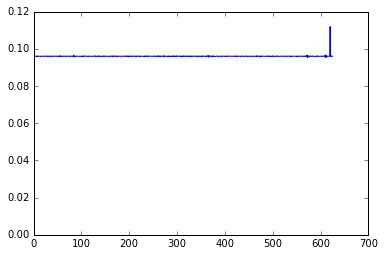

In [261]:
plot(cycle_times)

In [82]:
sort(cycle_times)[::-1][:10]

array([ 1.10404205,  0.12354302,  0.09769011,  0.09686708,  0.09666395,
        0.09661508,  0.09648609,  0.09646201,  0.09646201,  0.09630895])

In [73]:
np.mean(cycle_times)

0.10091600017387325

In [28]:
A

array([    980, -397763,  -62842,  -45906,  -82919,  -14813])

In [49]:
getPositions(motors)

[0, 1, -59474, -101246, -25208, 1]

### Ok, motor 4 has the bug I need to track down - it really looks like it's in the planned path!! What's going on here???

In [50]:
trajectories

In [53]:
t = trajectories[-1]

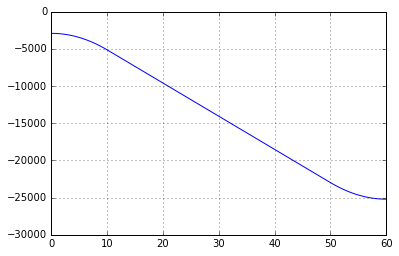

In [54]:
t.visualize()

## Ok, seems legit. 

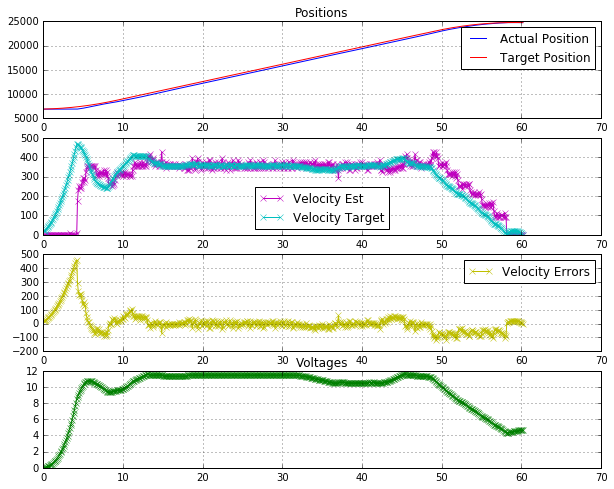

In [267]:
motors[4].visualizeMove()

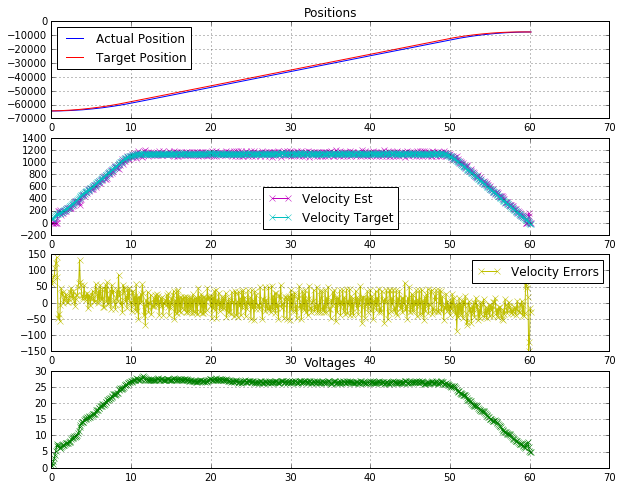

In [268]:
motors[2].visualizeMove()

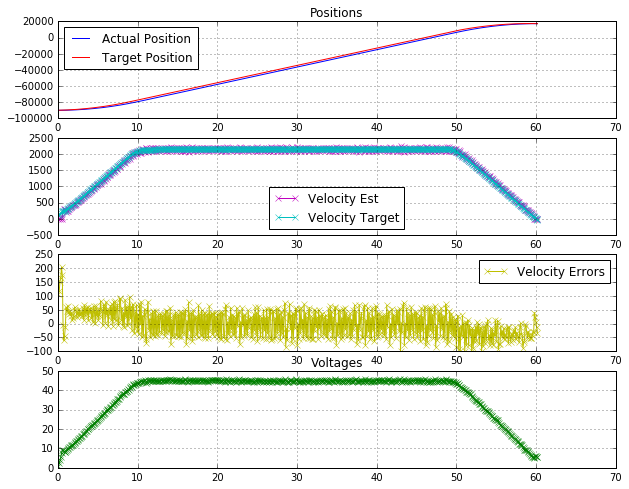

In [269]:
motors[3].visualizeMove()

In [136]:
# motors[2].visualizeMove()